In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import keras
import os,random,cv2

/home/thairsaadam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


ModuleNotFoundError: No module named 'cv2'

In [3]:
TRAIN_DIR ='train/'
TEST_DIR = 'test/'

ROWS = 64
COLS = 64
CHANNELS = 3

#train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
dog_label =['dog' for i in os.listdir(TRAIN_DIR) if 'dog' in i]
dog=zip(train_dogs,dog_label)

train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
cat_label =['cat' for i in os.listdir(TRAIN_DIR) if 'cat' in i]
cat=zip(train_cats,cat_label)

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]
# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset

print len(dog)
print len(cat)

train_images = dog[:2000] + cat[:2000]
random.shuffle(train_images)
a=zip(*train_images)
train=a[0]
label=a[1]
label=np.asarray(label)

j=7500
my_test=dog[j:j+500] +cat[j:j+500]
random.shuffle(my_test)
b=zip(*my_test)
testimage=b[0]
testlabel=b[1]
testlabel=np.asarray(testlabel)


print train[0],label[0]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
    return data

train = prep_data(train)
test=prep_data(testimage)
print train.shape,test.shape
#train= train.swapaxes(1,3)
#test=test.swapaxes(1,3)
print train.shape,test.shape


12500
12500
train/dog.3490.jpg dog
(15000, 64, 64) (5000, 64, 64)
(15000, 64, 64) (5000, 64, 64)


In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

cat
(15000, 64, 64) (15000,)


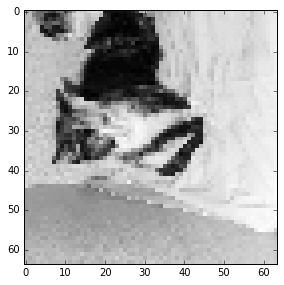

In [11]:
i=4
plt.subplot(221)
plt.imshow(train[i],cmap=plt.get_cmap('gray'))
print label[i]
print train.shape,label.shape
#print x_test.shape,y_test.shape"""

In [ ]:
num_pixels=train.shape[1]*train.shape[2]
X_train=train.reshape(train.shape[0],num_pixels).astype('float32')
X_test=test.reshape(test.shape[0],num_pixels).astype('float32')
y_train=label
y_test=testlabel
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape


In [78]:
X_train=X_train/255
X_test=X_test/255

In [79]:
#converting output labels to binary matrix
b,c=np.unique(y_train,return_inverse=True)
x,y=np.unique(y_test,return_inverse=True)

i=1
print "Label:",y_train[i]
Y_train=np_utils.to_categorical(c)
Y_test=np_utils.to_categorical(y)
print "Binary matrix:",Y_train[i]

print Y_train.shape

num_classes=Y_train.shape[1]

Label: cat
Binary matrix: [ 1.  0.]
(15000, 2)


In [80]:
def baselinemodel():
    model=Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,init='normal',activation='relu'))
    model.add(Dense(num_classes,init='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [81]:
model=baselinemodel()

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),nb_epoch=10,batch_size=200,verbose=2)

scores=model.evaluate(X_test,Y_test,verbose=0)
print("Error: %.2f%% "%(100-scores[1]*100))

Train on 15000 samples, validate on 5000 samples
Epoch 1/10
50s - loss: 7.9743 - acc: 0.4993 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
49s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
50s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
52s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10


KeyboardInterrupt: 